In [67]:
from first_stage_frlm import first_stage_frlm
from second_stage_frlm import second_stage_frlm
import networkx as nx
import pickle
import matplotlib.pyplot as plt

In [44]:


G = pickle.load( open('data/network_digital_twin_v0.2.pickle','rb'))

In [3]:
a = nx.shortest_path(G,"8864461", "8860547", weight='length_m')
harbour_exits = pickle.load( open("data/harbour_exits.p", "rb") )

In [4]:
harbour_exits[:5]

['8861581', '8860954', '8865802', '8864595', '8866901']

In [5]:
# Let's see whether the program works for the route from Brielle to Schwinhaven (near Zwijndrecht)
#now also added
df_b, df_g, df_eq_fq = first_stage_frlm(G, 40000, [("8864461", "8860547", 30)])

In [6]:
df_b

,"(8867784, 8863810, 8864235)","(8867784, 8866899, 8864235)","(8867784, 8867023, 8864235)"
q,,,
"(8864461, 8860547)",1,1,1


In [7]:
df_g

8863810  8867023  8867784  \
q                  h                                                        
(8864461, 8860547) (8867784, 8867023, 8864235)        0        2        2   
                   (8867784, 8863810, 8864235)        2        0        2   
                   (8867784, 8866899, 8864235)        0        0        2   

                                                8864235  8866899  
q                  h                                              
(8864461, 8860547) (8867784, 8867023, 8864235)        1        0  
                   (8867784, 8863810, 8864235)        1        0  
                   (8867784, 8866899, 8864235)        1        1

In [8]:
df_eq_fq

,e_q,f_q
q,,
"(8864461, 8860547)",1.0,30


In [9]:
optimal_facilities, optimal_flows = second_stage_frlm(6, 20, df_g, df_b, df_eq_fq)

CFRLM:
MAXIMIZE
30*Flow_captured_(('8864461',_'8860547'),_('8867784',_'8863810',_'8864235')) + 30*Flow_captured_(('8864461',_'8860547'),_('8867784',_'8866899',_'8864235')) + 30*Flow_captured_(('8864461',_'8860547'),_('8867784',_'8867023',_'8864235')) + 0
SUBJECT TO
_C1: - 20 Facilities_8863810
 + 60 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8863810',_'8864235'))
 <= 0

_C2: - 20 Facilities_8867023
 + 60 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8867023',_'8864235'))
 <= 0

_C3: - 20 Facilities_8867784
 + 60 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8863810',_'8864235'))
 + 60 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8866899',_'8864235'))
 + 60 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8867023',_'8864235'))
 <= 0

_C4: - 20 Facilities_8864235
 + 30 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8863810',_'8864235'))
 + 30 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8866899',_'8864235'))
 + 30 Flow_captured_(('8864461',_'886

In [10]:
optimal_flows

{Flow_captured_(('8864461',_'8860547'),_('8867784',_'8863810',_'8864235')): 0.0,
 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8866899',_'8864235')): 0.66666667,
 Flow_captured_(('8864461',_'8860547'),_('8867784',_'8867023',_'8864235')): 0.0}

## Seems to go quite okay!
Also try with multiple OD sets for illustration

In [11]:
#now also added: Brielle to Middelharnis and Brielle to Ridderkerk
%time df_b, df_g, df_eq_fq = first_stage_frlm(G, 60000, [("8864461", "8860547", 30), ("8864461", "8862620", 20), ("8864461", "8860687", 10)])

CPU times: total: 7.33 s
Wall time: 7.34 s


In [12]:
df_b

,"(8867784, 8860968)","(8867784, 8863810)","(8866686, 8864482)","(8864009, 8864235)","(8865086, 8864235)","(8867588, 8864235)","(8864482, 8867528)","(8864009, 8862585)","(8861736, 8867588)","(8865803, 8865086)",...,"(8865803, 8867588)","(8861736, 8863988)","(8866686, 8865803)","(8865803, 8867528)","(8867784, 8867023)","(8865803, 8865818)","(8865803, 8864009)","(8863988, 8864482)","(8865818, 8864482)","(8863810, 8864235)"
q,,,,,,,,,,,,,,,,,,,,,
"(8864461, 8860547)",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
"(8864461, 8862620)",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(8864461, 8860687)",0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,0


In [13]:
df_g

8865803  8865818  8867528  8863810  \
q                  h                                                        
(8864461, 8860547) (8867023, 8864235)        0        0        0        0   
                   (8863810, 8864235)        0        0        0        2   
                   (8866899, 8864235)        0        0        0        0   
                   (8867784, 8867023)        0        0        0        0   
                   (8867784, 8863810)        0        0        0        2   
                   (8867784, 8866899)        0        0        0        0   
(8864461, 8862620) (8867784, 8860968)        0        0        0        0   
(8864461, 8860687) (8863988, 8864235)        0        0        0        0   
                   (8865086, 8864235)        0        0        0        0   
                   (8865818, 8864235)        0        2        0        0   
                   (8867528, 8864235)        0        0        2        0   
                   (8864009, 8864235)        0        0        0        0   
                   (8867588, 8864235)        0        0        0        0   
                   (8866686, 8864235)        0        0        0        0   
                   (8865803, 8863988)        2        0        0        0   
                   (8865803, 8865086)        2        0        0        0   
                   (8865803, 8865818)        2        2        0        0   
                   (8865803, 8867528)        2        0        2        0   
                   (8865803, 8864009)        2        0        0        0   
                   (8865803, 8867588)        2        0        0        0   
                   (8866686, 8865803)        2        0        0        0   
                   (8863988, 8862585)        0        0        0        0   
                   (8865086, 8862585)        0        0        0        0   
                   (8865818, 8862585)        0        2        0        0   
                   (8867528, 8862585)        0        0        2        0   
                   (8864009, 8862585)        0        0        0        0   
                   (8867588, 8862585)        0        0        0        0   
                   (8866686, 8862585)        0        0        0        0   
                   (8863988, 8864482)        0        0        0        0   
                   (8865086, 8864482)        0        0        0        0   
                   (8865818, 8864482)        0        2        0        0   
                   (8864482, 8867528)        0        0        2        0   
                   (8864482, 8864009)        0        0        0        0   
                   (8867588, 8864482)        0        0        0        0   
                   (8866686, 8864482)        0        0        0        0   
                   (8861736, 8863988)        0        0        0        0   
                   (8861736, 8865086)        0        0        0        0   
                   (8865818, 8861736)        0        2        0        0   
                   (8861736, 8867528)        0        0        2        0   
                   (8861736, 8864009)        0        0        0        0   
                   (8861736, 8867588)        0        0        0        0   
                   (8866686, 8861736)        0        0        0        0   

                                       8862585  8867023  8867588  8864482  \
q                  h                                                        
(8864461, 8860547) (8867023, 8864235)        0        2        0        0   
                   (8863810, 8864235)        0        0        0        0   
                   (8866899, 8864235)        0        0        0        0   
                   (8867784, 8867023)        0        2        0        0   
                   (8867784, 8863810)        0        0        0        0   
                   (8867784, 8866899)        0        0        0        0   
(8864461, 8862620) (8867784, 88609

In [14]:
%time optimal_facilities, optimal_flows = second_stage_frlm(10, 20, df_g, df_b, df_eq_fq)

CFRLM:
MAXIMIZE
30*Flow_captured_(('8864461',_'8860547'),_('8863810',_'8864235')) + 30*Flow_captured_(('8864461',_'8860547'),_('8866899',_'8864235')) + 30*Flow_captured_(('8864461',_'8860547'),_('8867023',_'8864235')) + 30*Flow_captured_(('8864461',_'8860547'),_('8867784',_'8863810')) + 30*Flow_captured_(('8864461',_'8860547'),_('8867784',_'8866899')) + 30*Flow_captured_(('8864461',_'8860547'),_('8867784',_'8867023')) + 10*Flow_captured_(('8864461',_'8860687'),_('8861736',_'8863988')) + 10*Flow_captured_(('8864461',_'8860687'),_('8861736',_'8864009')) + 10*Flow_captured_(('8864461',_'8860687'),_('8861736',_'8865086')) + 10*Flow_captured_(('8864461',_'8860687'),_('8861736',_'8867528')) + 10*Flow_captured_(('8864461',_'8860687'),_('8861736',_'8867588')) + 10*Flow_captured_(('8864461',_'8860687'),_('8863988',_'8862585')) + 10*Flow_captured_(('8864461',_'8860687'),_('8863988',_'8864235')) + 10*Flow_captured_(('8864461',_'8860687'),_('8863988',_'8864482')) + 10*Flow_captured_(('8864461',_'8

In [15]:
optimal_facilities

{'8860968': 1.0,
 '8861736': 1.0,
 '8862585': 0.0,
 '8863810': 0.0,
 '8863988': 0.0,
 '8864009': 0.0,
 '8864235': 1.0,
 '8864482': 0.0,
 '8865086': 0.0,
 '8865803': 0.0,
 '8865818': 0.0,
 '8866686': 0.0,
 '8866899': 2.0,
 '8867023': 0.0,
 '8867528': 1.0,
 '8867588': 0.0,
 '8867784': 4.0}

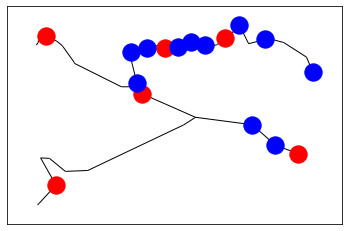

In [68]:
# Draw network, routes and charging stations

#Define new graph H with only nodes and edges in routes

OD_list = [("8864461", "8860547", 30), ("8864461", "8862620", 20), ("8864461", "8860687", 10)]

# OD_list = [("8864461", "8860547", 30)]#, ("8864461", "8862620", 20), ("8864461", "8860687", 10)]

# OD_list = [("8864991", "8863072", 10)]
node_list =[]
for origin, destination, flow in OD_list:
    for node in nx.dijkstra_path(G, origin, destination, weight='length_m'):
        if node not in node_list:
            node_list.append(node)

H = G.subgraph(node_list)

#create pos dict
pos_dict = {}
for node in node_list:
    pos_dict[node] = (G.nodes[node]['X'],G.nodes[node]['Y'])





other_ks =[]
fuel_stations = []

for key, number_of_stations in optimal_facilities.items():
    if number_of_stations > 0:
        fuel_stations.append(key)
    else:
        other_ks.append(key)


# x = nx.get_node_attributes(H, 'X')
# y = nx.get_node_attributes(H, 'Y')

# for key, item in x.items():
#     pos_dict[key] = (x[key],y[key])
# pos = (x,y)
    # print(pos)

# print(fuel_stations)
# H2 = H.subgraph[fuel_stations]
#
nx.draw_networkx_edges(H, pos = pos_dict)

nx.draw_networkx_nodes(G,pos_dict, fuel_stations, node_color='red')
nx.draw_networkx_nodes(G,pos_dict,other_ks, node_color='blue')
plt.show()

In [57]:
OD_list = [("8864461", "8860547", 30), ("8864461", "8862620", 20), ("8864461", "8860687", 10)]
